In [74]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.core.groupby.groupby import DataFrame

In [75]:
df = pd.read_csv('Netflix_data.csv', header=0)
df.head()

,Unnamed: 0,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


1- convert date_added to the correct format .
2- take the movie's data
3- deal with this columns [title,rating,country,duration,date_added]

In [76]:
df.date_added = pd.to_datetime(df.date_added)
df_movie = df[df.type == 'Movie']
df_movie = df_movie[['title','rating','country','duration','date_added']]
print(len(df_movie))
df_movie

6126


,title,rating,country,duration,date_added
0,Dick Johnson Is Dead,PG-13,United States,90 min,2021-09-25
3,Confessions of an Invisible Girl,TV-PG,Brazil,91 min,2021-09-22
4,Sankofa,TV-MA,United States,125 min,2021-09-24
6,The Starling,PG-13,United States,104 min,2021-09-24
7,Motu Patlu in the Game of Zones,TV-Y7,India,87 min,2021-05-01
...,...,...,...,...,...
8702,The Bund,TV-14,Hong Kong,103 min,2018-09-20
8707,The Darkest Dawn,TV-MA,United Kingdom,75 min,2018-06-23
8716,The Great Battle,TV-MA,South Korea,136 min,2019-04-08
8763,"Twisted Trunk, Big Fat Body",TV-14,India,89 min,2017-01-15


convert duration data to numeric data

In [77]:
temp_dur = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)
df_movie = df_movie.drop('duration',axis=1)
df_movie

,title,rating,country,date_added,duration_minutes
0,Dick Johnson Is Dead,PG-13,United States,2021-09-25,90
3,Confessions of an Invisible Girl,TV-PG,Brazil,2021-09-22,91
4,Sankofa,TV-MA,United States,2021-09-24,125
6,The Starling,PG-13,United States,2021-09-24,104
7,Motu Patlu in the Game of Zones,TV-Y7,India,2021-05-01,87
...,...,...,...,...,...
8702,The Bund,TV-14,Hong Kong,2018-09-20,103
8707,The Darkest Dawn,TV-MA,United Kingdom,2018-06-23,75
8716,The Great Battle,TV-MA,South Korea,2019-04-08,136
8763,"Twisted Trunk, Big Fat Body",TV-14,India,2017-01-15,89


show the number of movies based on the duration

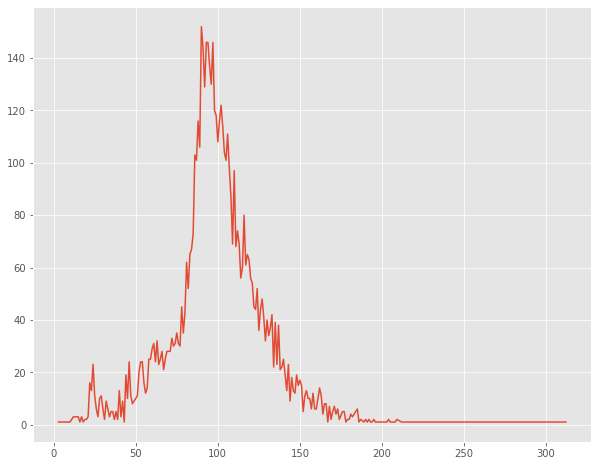

In [78]:
plt.figure(figsize=[10,8])

df_movie['duration_minutes'].value_counts().sort_index().plot.line()

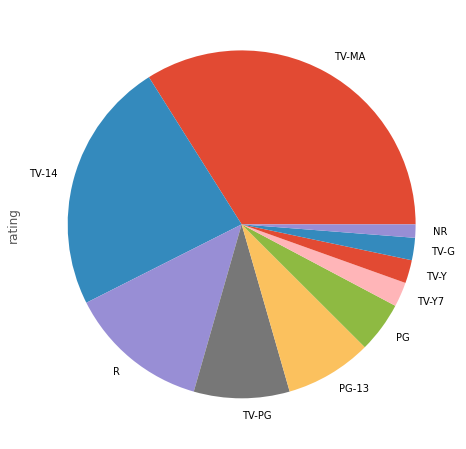

In [79]:
ratings = df_movie['rating'].value_counts().head(10)

plt.figure(figsize=[8,8])
ratings.plot(kind='pie')
plt.show()

**Waffle Charts**

In [80]:
mpl.style.use('ggplot') 

In [81]:
countries = df_movie['country'].value_counts().head(3)
countries

United States     2395
India              976
United Kingdom     387
Name: country, dtype: int64

In [82]:
df_countries = {'country': countries.index.tolist(),'Total' : ['','','']}
df_countries = pd.DataFrame(df_countries)

df_countries.set_index('country', inplace = True)
df_countries['Total'] = list(countries.values)
df_countries

,Total
country,
United States,2395
India,976
United Kingdom,387


In [83]:
total_values = sum(df_countries['Total'])
category_proportions = [(float(value) / total_values) for value in df_countries['Total']]

for i, proportion in enumerate(category_proportions):
    print (df_countries.index.values[i] + ': ' + str(proportion))

United States: 0.6373070782331027
India: 0.2597126130920703
United Kingdom: 0.10298030867482703


In [84]:
width = 40
height = 10 
total_num_tiles = width * height
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_countries.index.values[i] + ': ' + str(tiles))

United States: 255
India: 104
United Kingdom: 41


initialize the waffle chart as an empty matrix and define indices to loop through waffle chart

In [85]:
waffle_chart = np.zeros((height, width))
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1       
            
        waffle_chart[row, col] = category_index

instantiate a new figure object and use matshow to display the waffle chart


<Figure size 432x288 with 0 Axes>

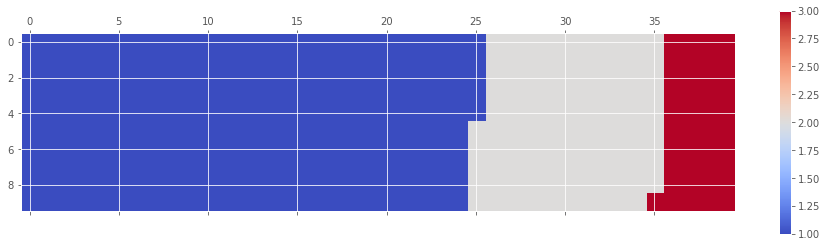

In [86]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()